# Fake News Detection using Machine Learning
# Model: TF-IDF + Logistic Regression


In [7]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import joblib


In [8]:
# NOTE:
# True.csv and Fake.csv are NOT uploaded to GitHub due to size limits

true_df = pd.read_csv(
    "True.csv",
    engine="python",
    on_bad_lines="skip"
)

fake_df = pd.read_csv(
    "Fake.csv",
    engine="python",
    on_bad_lines="skip"
)

true_df["label"] = 0   # Real news
fake_df["label"] = 1   # Fake news

df = pd.concat([true_df, fake_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


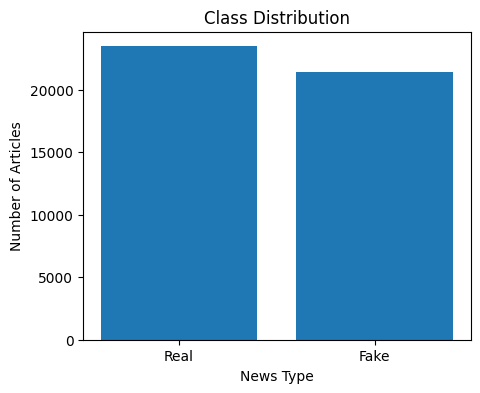

In [10]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(5,4))
plt.bar(["Real", "Fake"], label_counts.values)
plt.title("Class Distribution")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")
plt.show()



In [11]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.7
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("ML Model Accuracy:", accuracy)


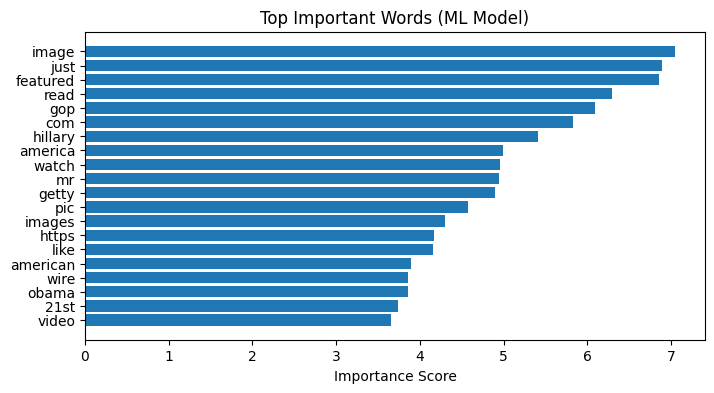

In [14]:
feature_names = vectorizer.get_feature_names_out()
importance = model.coef_[0]

top_indices = np.argsort(importance)[-20:]
top_words = feature_names[top_indices]
top_scores = importance[top_indices]

plt.figure(figsize=(8,4))
plt.barh(top_words, top_scores)
plt.title("Top Important Words (ML Model)")
plt.xlabel("Importance Score")
plt.show()


In [15]:
joblib.dump(model, "ml_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("ML model and vectorizer saved")


ML model and vectorizer saved
